In [1]:
#!/usr/bin/env python3
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
from train import *
from model import *
%matplotlib inline

## ---------------------- load data ----------------------------------------
with open("../data/2k.pkl", "rb") as f:
    x, y = pkl.load(f)

Welcome to JupyROOT 6.26/02


## Find optimal learning rate range

In [ ]:
model = build_model_no_config(x[0].shape, y.shape[-1])
print(x.shape[0])

lr = 0.001
opt= SGD(lr)
model.compile(optimizer=opt, loss="mse", metrics=["accuracy"])

lr_finder = LRFinder(model)
lr_finder.find(x, y, start_lr=1e-7, end_lr=3, batch_size=256, epochs=5)

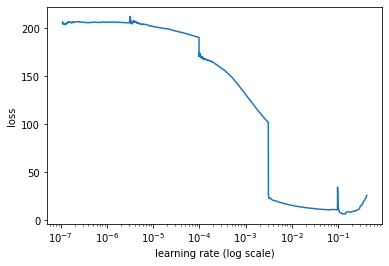

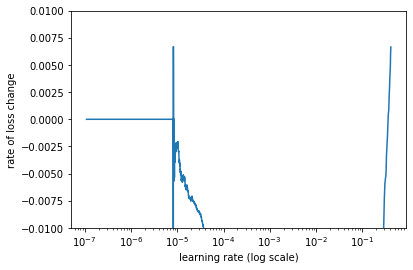

In [21]:
lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)
plt.show()
lr_finder.plot_loss_change(sma=1000, n_skip_beginning=20, n_skip_end=5)
plt.show()

## Use 1cycle LR policy

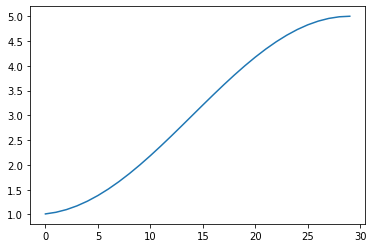

In [2]:
from one_cycle import *
x = np.arange(30)
cos = CosineAnnealer(1, 5, 30)
y = [cos.step() for i in range(30)]
plt.plot(x, y)
plt.show()

In [6]:
epochs = 20
spe = 5000
one_cycle = OneCycleSchedule(1e-6, 0.001, 4*spe)

one_cycle